In [1]:
import numpy as np
import cv2
from scipy.sparse import diags
from scipy.sparse import dia_matrix
import scipy
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve, cg
from numba import jit

In [2]:
'''
import os
os.getcwd()
os.chdir("./cs283_SeamlessEditing/") 
'''

'\nimport os\nos.getcwd()\nos.chdir("./cs283_SeamlessEditing/") \n'

In [3]:
from src.poisson_solver import *
from src.equation import *

In [4]:
paths = "./test/"
destination = "swan.jpg"
source = "kyt.jpg"
save = "mask.png"

In [5]:
source = plt.imread(paths + source)  # source=mp.image_g
destination = plt.imread(paths + destination)  # destination=mp.image_f

tx, ty = (-184, -158)
mask = plt.imread(paths + save)
mask[mask != 1] = 0
mask = mask[:,:,0]

In [21]:
test = Poisson_system(source=source, destination=source, mask=mask, offset=[0,0])

In [7]:
v = test._masked_gradients()

In [22]:
A, b = test.get_Ab('masked_gradients')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1335 but corresponding boolean dimension is 1308

In [11]:
from numba.typed import List

data_ = List()
[data_.append(np.array(x)) for x in A.data];

rows_ = List()
[rows_.append(np.array(x)) for x in A.rows];

diag = A.diagonal()

In [16]:
omega = 1.8
x0 = test.f[test.mask == 1]
x1 = sor_solver_jit(data_, rows_, diag, b, omega, x0, 5e-3)

0 2217.3837562909407
50 4.325612746992925
57
func:'sor_solver_jit' took: 6.3964 sec


In [17]:
res = test.combine(x1)

In [15]:
from src.gradient_field import *

koko = Gradient_Field(source=source, destination=destination, mask=mask, offset=[tx, ty],  neighbor_ker=4)
A1, b1 = koko.get_v(method='dg')

Importing gradients: v=dg


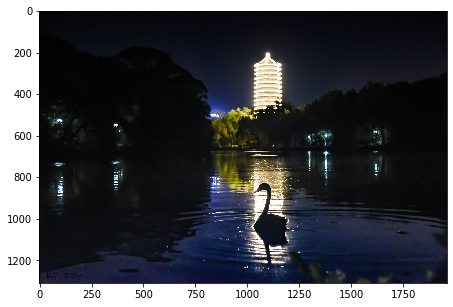

In [18]:
plt.rcParams['figure.figsize'] = (12,5)
plt.imshow(res)

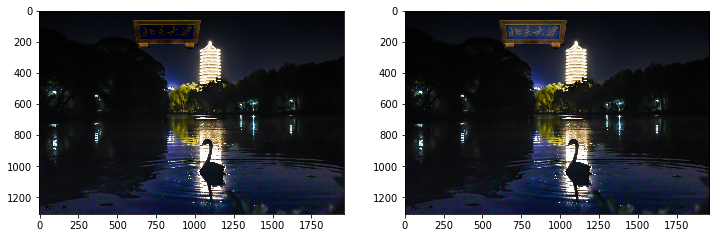

In [21]:
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
plt.imshow(test.combine(x1))

plt.subplot(1,2,2)
plt.imshow(test.combine(x2))

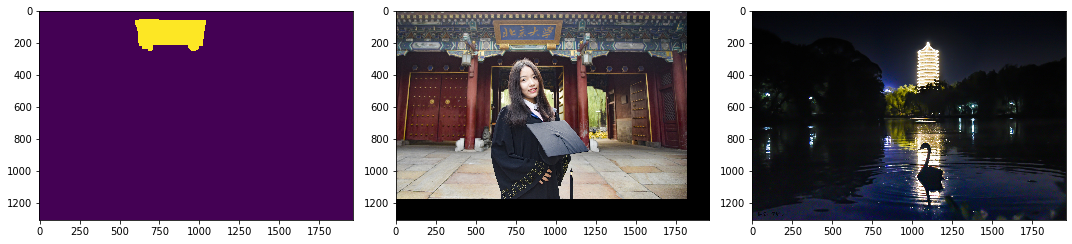

In [24]:
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,3,1)
plt.imshow(test.mask)

plt.subplot(1,3,2)
plt.imshow(test.g)

plt.subplot(1,3,3)
plt.imshow(test.f)
plt.tight_layout()

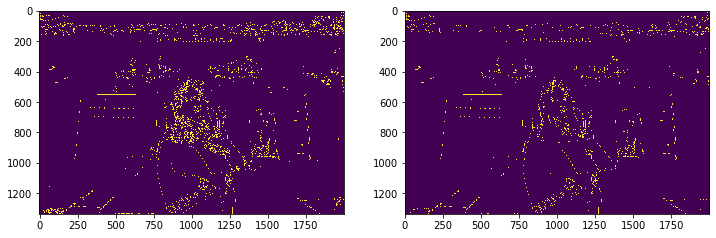

In [18]:
#edge = cv2.Canny(cv2.cvtColor(destination, cv2.COLOR_RGB2GRAY), 50, 100)
plt.rcParams['figure.figsize'] = (12,5)

plt.subplot(1,2,1)
plt.imshow(cv2.Canny(cv2.cvtColor(source, cv2.COLOR_RGB2GRAY), 10, 300)
)

plt.subplot(1,2,2)
plt.imshow(cv2.Canny(cv2.cvtColor(source, cv2.COLOR_RGB2GRAY), 100, 300)
)

In [11]:
edge = cv2.Canny(cv2.cvtColor(destination.astype(np.uint8), cv2.COLOR_RGB2GRAY), 100, 300)

In [7]:
np.unique(edge)

array([  0, 255], dtype=uint8)

In [ ]:
plt.hist(edge.flatten(), bins = 40);

In [28]:
def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray, (3,3), 0) # Denoise
    detected_edges = cv2.Canny(detected_edges, lowThreshold, lowThreshold*ratio,apertureSize=kernel_size) # Canny Edge Detect
    dst = cv2.bitwise_and(im, im, mask=detected_edges) # Get Edge Image With Color
    cv2.imshow('canny', dst)
# Settings
lowThreshold = 0 # Track Bar Start from State-0
max_lowThreshold = 100 # Track Bar End with State-100
ratio = 3 # threshold2 = threshold1 * ratio
kernel_size = 3 # Size of Sobel
# Running
if __name__ == '__main__':
    im = cv2.imread('tower.jpg') # Read From File
    gray = cv2.cvtColor(source, cv2.COLOR_RGB2GRAY) # GBR Convert To Gray
    cv2.namedWindow('canny') # Create New Window